# BDA학회 데이터 분석 모델링반 (ML2) 2주차 복습과제

제출자 성명: 이승섭89

2주차에는 코드를 다루지 않았으므로 1주차 코드를 복습합니다.

Python 3.10.14 버전을 사용합니다.

## 0. Import Relevant Libraries
회귀와 분류에 필요한 여러 라이브러리를 불러옵니다.

In [29]:
# Common
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.datasets import make_blobs, make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 1. Review: Regression
여러 형태의 데이터셋에 회귀분석을 시도하고, 각각의 정확도와 적합성을 정성적으로 평가합니다.

### 0. Prepare Datasets

In [30]:
# Seed
np.random.seed(42)

# Dataset generation function
def generate_data():
    # 1. Linear
    X_linear = np.random.rand(100, 1) * 10
    y_linear = 3 * X_linear + 5 + np.random.randn(100, 1) * 2

    # 2. Non-linear
    X_nonlinear = np.random.rand(100, 1) * 10
    y_nonlinear = X_nonlinear ** 2 + np.random.randn(100, 1) * 10

    # 3. Random
    X_random = np.random.rand(100, 1) * 10
    y_random = np.random.rand(100, 1) * 100

    return (X_linear, y_linear), (X_nonlinear, y_nonlinear), (X_random, y_random)

In [31]:
# Generate data
data_linear, data_nonlinear, data_random = generate_data()

# Convert to DataFrame
def to_dataframe(X, y, label):
    return pd.DataFrame(np.hstack((X, y)), columns=["X", label])

df_linear = to_dataframe(*data_linear, "y_linear")
df_nonlinear = to_dataframe(*data_nonlinear, "y_nonlinear")
df_random = to_dataframe(*data_random, "y_random")

# Split data
def split_data(df, y_label):
    return train_test_split(df[["X"]], df[y_label], test_size=0.2, random_state=42)

X_train_linear, X_test_linear, y_train_linear, y_test_linear = split_data(df_linear, "y_linear")
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = split_data(df_nonlinear, "y_nonlinear")
X_train_random, X_test_random, y_train_random, y_test_random = split_data(df_random, "y_random")

### 1. Create Models

In [32]:
# Initialize models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, label):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    return {
        "Model": label,
        "Train MSE": mse_train,
        "Test MSE": mse_test,
        "Train R2": r2_train,
        "Test R2": r2_test
    }

### 2. Train Models

In [33]:
# List of models
models = [
    (lin_reg, "Linear Regression"),
    (tree_reg, "Decision Tree"),
    (forest_reg, "Random Forest")
]

# List of data
datasets = [
    (X_train_linear, X_test_linear, y_train_linear, y_test_linear, "Linear Data"),
    (X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear, "Nonlinear Data"),
    (X_train_random, X_test_random, y_train_random, y_test_random, "Random Data")
]

In [34]:
# Evaluate and store results
results = []
for model, model_name in models:
    for X_train, X_test, y_train, y_test, data_label in datasets:
        results.append(evaluate_model(model, X_train, X_test, y_train, y_test, f"{model_name} ({data_label})"))

In [35]:
# Results as DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                                Model   Train MSE     Test MSE  Train R2  \
0     Linear Regression (Linear Data)    3.390715     2.614798  0.955206   
1  Linear Regression (Nonlinear Data)  124.919456   199.141082  0.866767   
2     Linear Regression (Random Data)  780.984020   565.504859  0.001666   
3         Decision Tree (Linear Data)    0.000000     3.587792  1.000000   
4      Decision Tree (Nonlinear Data)    0.000000   119.879399  1.000000   
5         Decision Tree (Random Data)    0.000000  1814.781291  1.000000   
6         Random Forest (Linear Data)    0.660085     2.971226  0.991280   
7      Random Forest (Nonlinear Data)   18.052617    97.803606  0.980746   
8         Random Forest (Random Data)  174.738617  1184.547996  0.776631   

    Test R2  
0  0.968635  
1  0.849911  
2 -0.007081  
3  0.956963  
4  0.909649  
5 -2.231857  
6  0.964359  
7  0.926287  
8 -1.109505  


### 3. Plot Results


In [36]:
# Plotting function
def plot_data_with_predictions(X, y, model, title, ax):
    ax.scatter(X, y, color='blue', alpha=0.5, label='True')
    X_range = pd.DataFrame(np.linspace(X.min(), X.max(), 100).reshape(-1, 1), columns=X_train.columns)
    y_pred = model.predict(X_range)
    ax.plot(X_range, y_pred, color='red', label='Prediction')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()

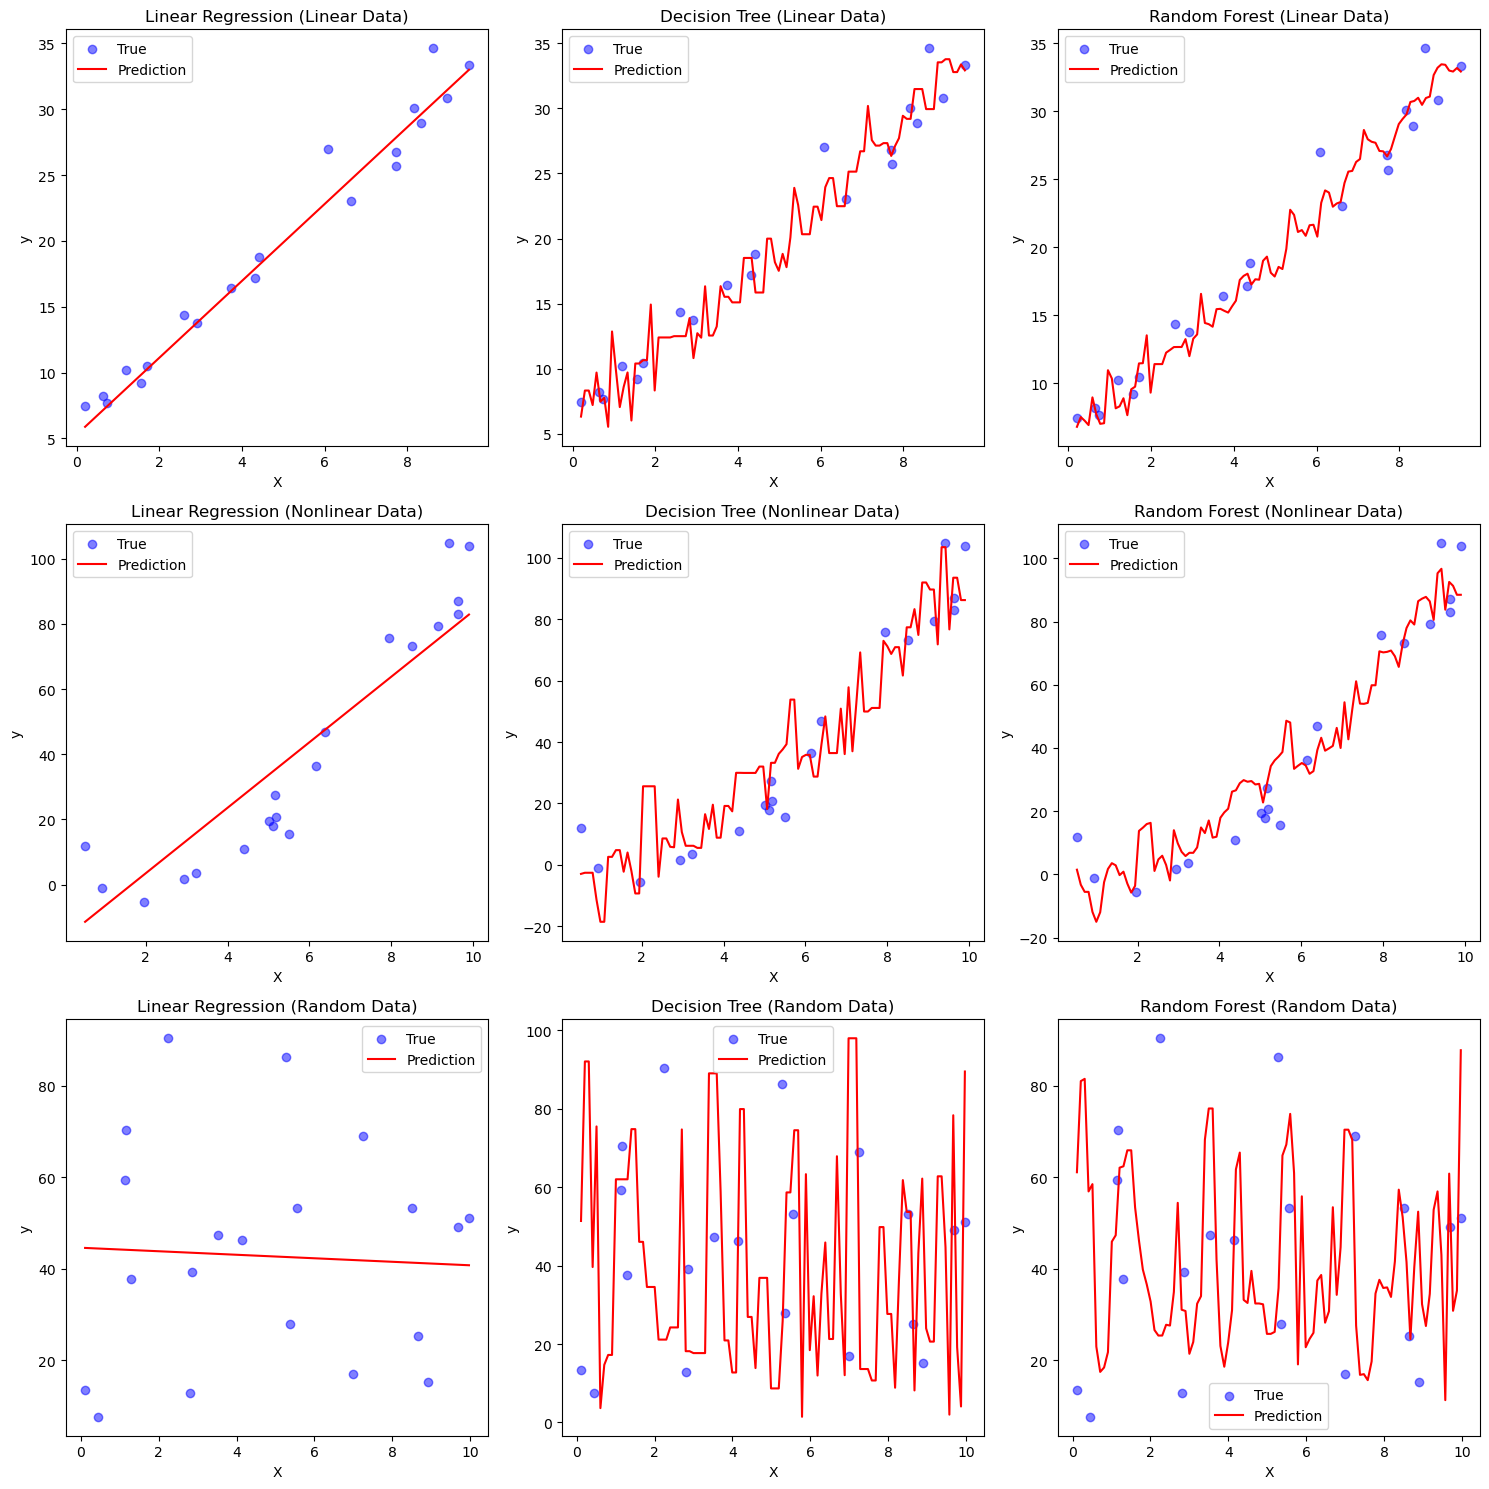

In [37]:
# Plot data with predictions
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test, data_label) in enumerate(datasets):
    for j, (model, model_name) in enumerate(models):
        ax = axes[i, j]
        model.fit(X_train, y_train)
        plot_data_with_predictions(X_test, y_test, model, f"{model_name} ({data_label})", ax)

plt.tight_layout()
plt.show()

## 2. Review: Classification

랜덤 데이터셋에 대해 여러 가지 분류 모델을 적용하고, 각 모델의 특성을 정성적으로 이해합니다.

### 0. Create Dataset

In [38]:
# Data generation function
def generate_datasets():
    X_linear, y_linear = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42, cluster_std=1.5)
    X_nonlinear, y_nonlinear = make_moons(n_samples=200, noise=0.2, random_state=42)
    X_random, y_random = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                                             n_clusters_per_class=1, random_state=42, flip_y=0.5)
    return (X_linear, y_linear), (X_nonlinear, y_nonlinear), (X_random, y_random)

datasets = generate_datasets()
dataset_names = ["Linear Data", "Nonlinear Data", "Random Data"]

### 1. Visualize Data

In [39]:
# Data visualization function
def plot_data(X, y, title, ax):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", alpha=0.8, ax=ax)
    ax.set_title(title)

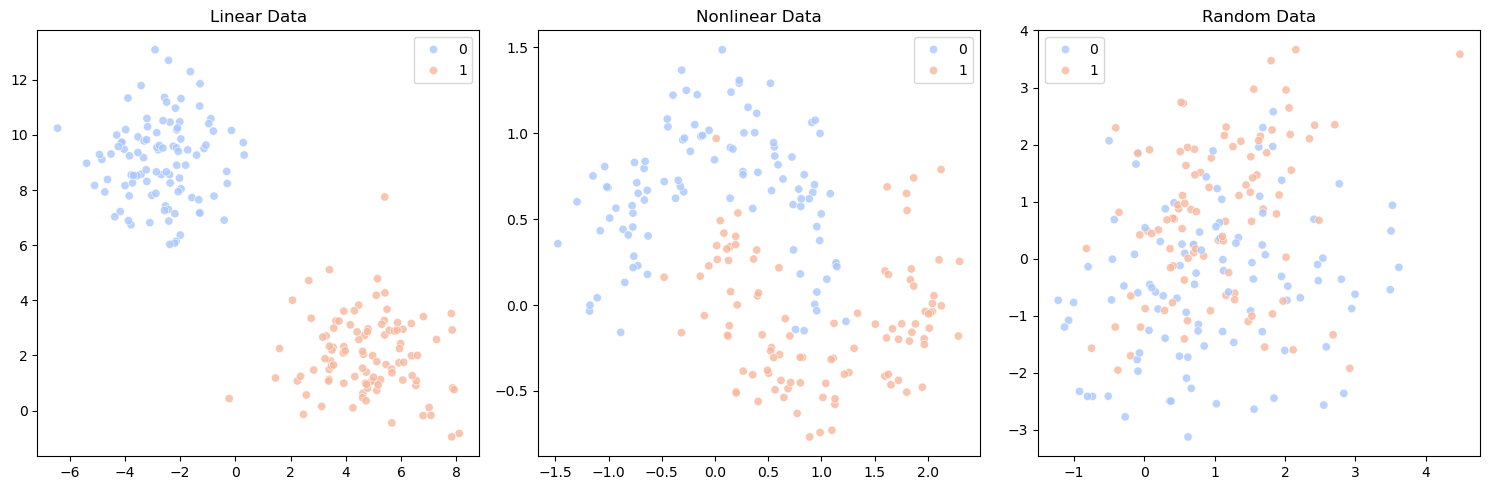

In [40]:
fig_data, axs_data = plt.subplots(1, 3, figsize=(15, 5))

for i, (dataset, dataset_name) in enumerate(zip(datasets, dataset_names)):
    X, y = dataset
    plot_data(X, y, dataset_name, axs_data[i])

plt.tight_layout()
plt.show()

### 2. Create Models

In [41]:
# Create Models
def initialize_models():
    return [
        (LogisticRegression(), "Logistic Regression"),
        (DecisionTreeClassifier(random_state=42), "Decision Tree"),
        (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
        (SVC(kernel='rbf', random_state=42), "SVM")
    ]

models = initialize_models()

### 3. Train and Visualize Models

In [42]:
# Evaluate and plot decision boundary function
def evaluate_and_plot_decision_boundary(model, X_train, X_test, y_train, y_test, ax, title):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)

    print(f"{title} Test Accuracy: {acc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    plot_decision_boundary(model, X_train, y_train, title, ax)


# Plot decision boundary function
def plot_decision_boundary(model, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)

Logistic Regression (Linear Data) Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Decision Tree (Linear Data) Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Random Forest (Linear Data) Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.

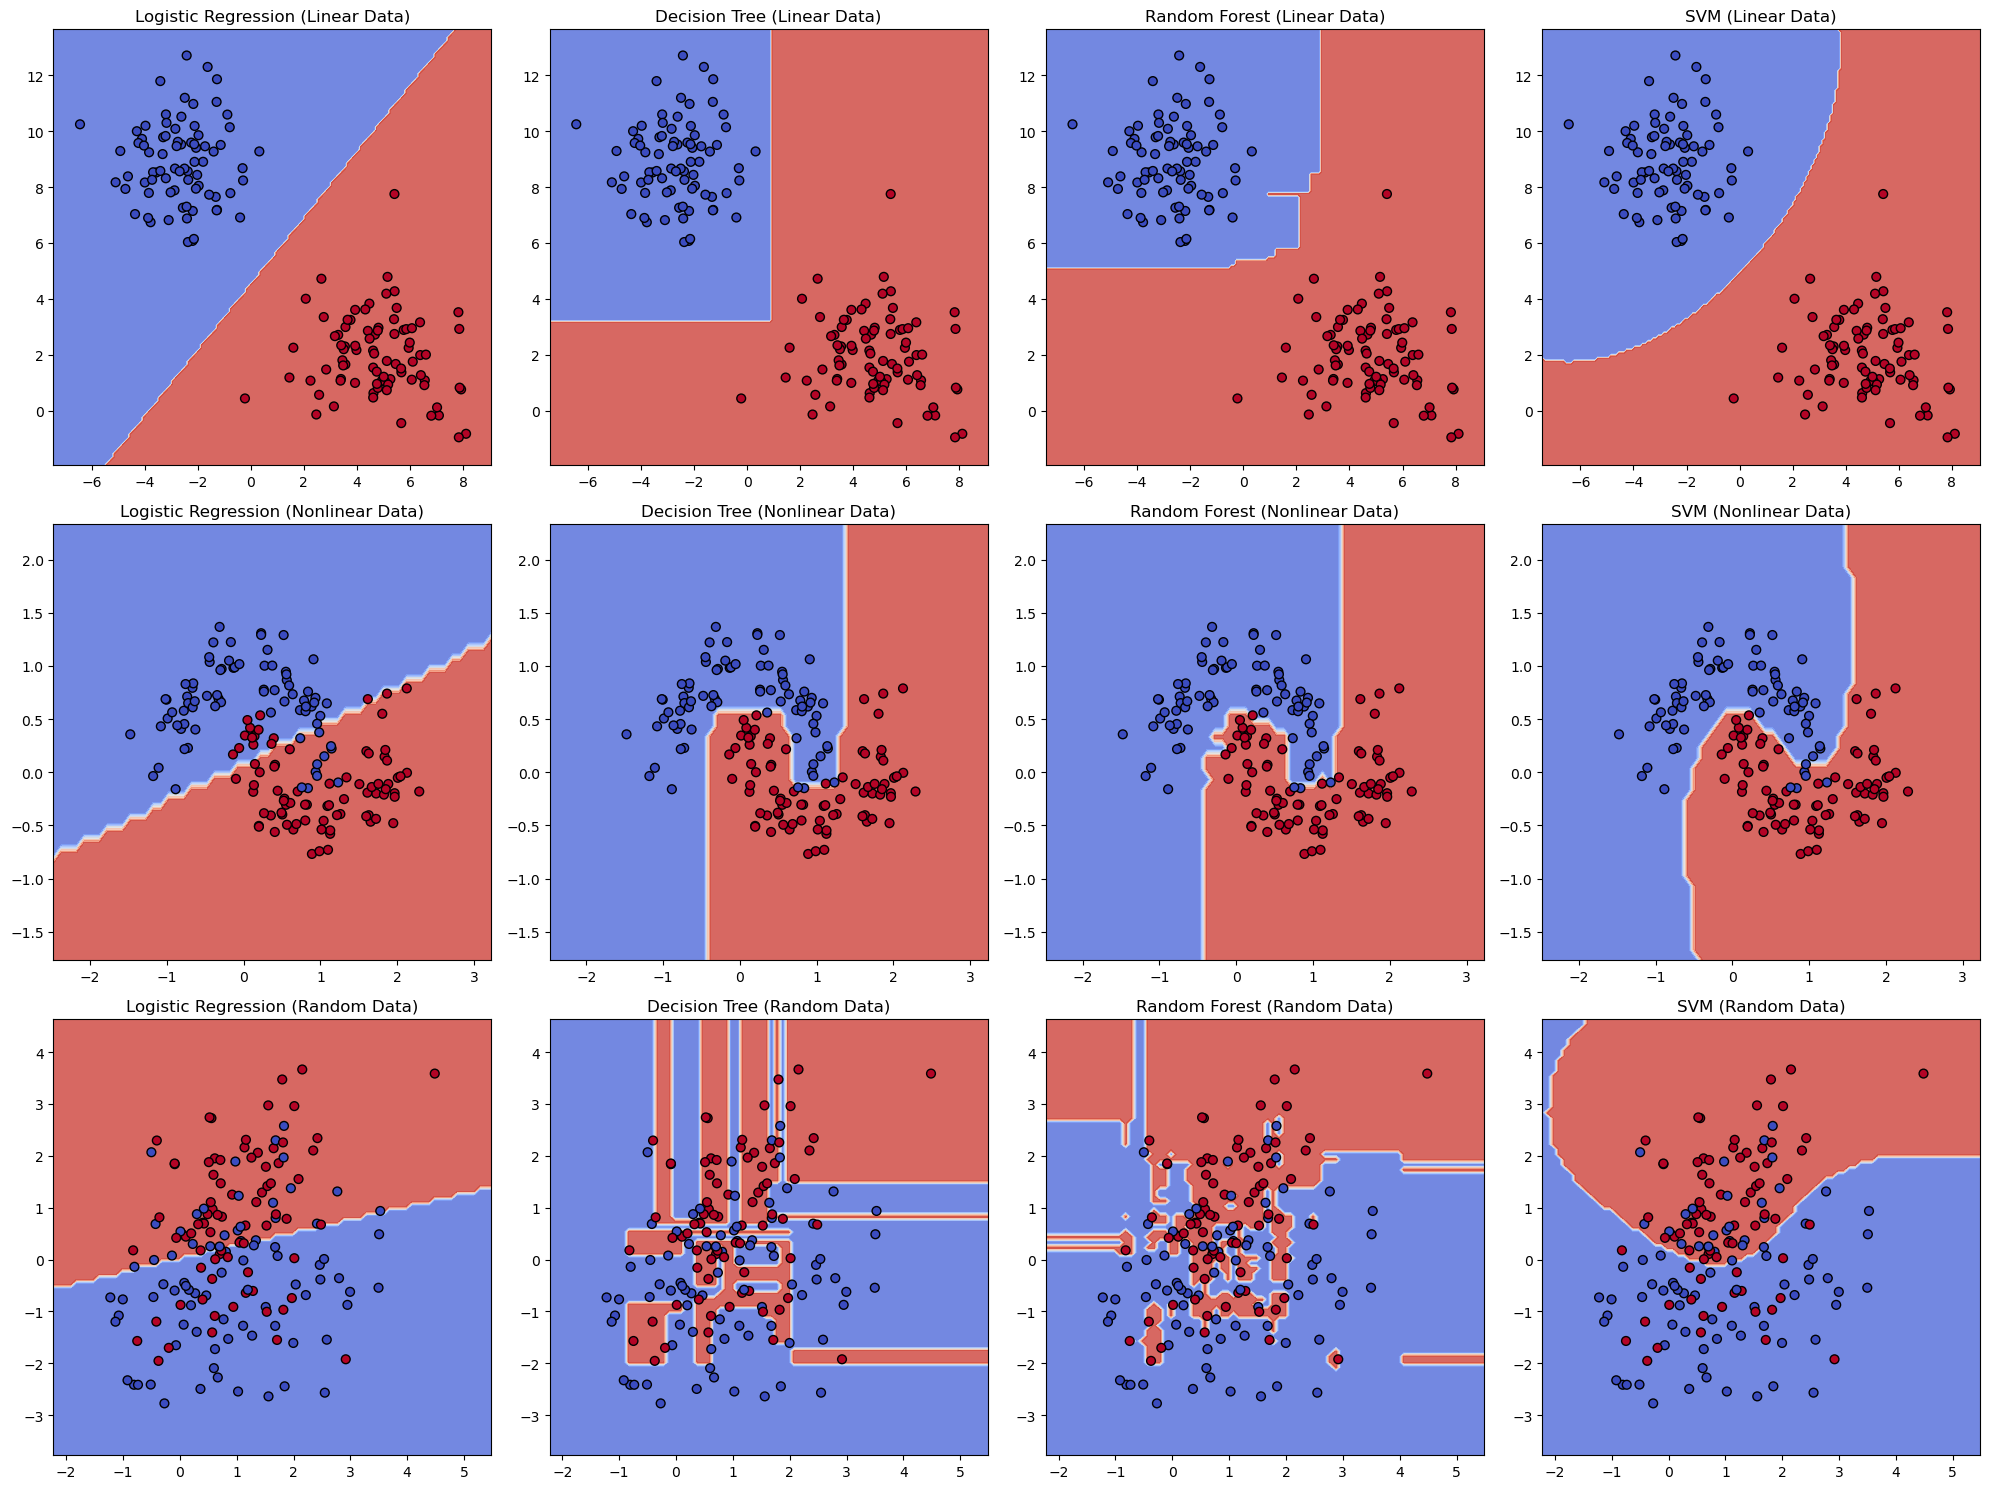

In [43]:
# Train and evaluate models
fig_boundaries, axs_boundaries = plt.subplots(3, 4, figsize=(20, 15))

for i, (dataset, dataset_name) in enumerate(zip(datasets, dataset_names)):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for j, (model, model_name) in enumerate(models):
        ax = axs_boundaries[i, j]
        evaluate_and_plot_decision_boundary(model, X_train, X_test, y_train, y_test, ax, f"{model_name} ({dataset_name})")

plt.tight_layout()
plt.show()

In [ ]:
# Blank code for "Run All"